# **9. Image Transform**

In [2]:
from configs.config import DATA_PATH
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

path = os.path.join(DATA_PATH, 'image', 'opencv_image5.jpg')
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)

## **1. Affine Transform** 
* Affine Transform은 행렬 연산 기반의 이미지 변환이다.

* 직선, 평행의 특성 등은 유지한 채 변환한다.

* 시작점 3개 -> 끝점 3개를 만족하는 변환행렬을 찾는다.

* 이미지에 대해서 각 변환행렬을 적용한다.

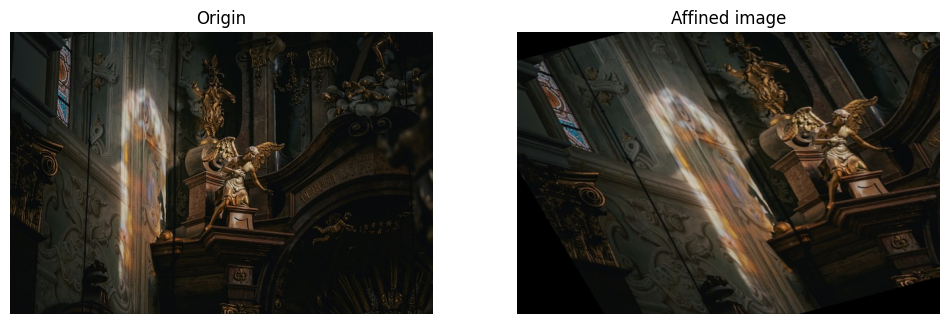

In [12]:
h,w,_ = img.shape
start = np.float32([[50, 50], [200, 50], [50, 200]])
end = np.float32([[10, 100], [200, 50], [100, 250]])
affine_matrix = cv2.getAffineTransform(start, end) # * start -> end를 매핑하는 행렬 찾기

img_affined = cv2.warpAffine(img, affine_matrix, (w,h))


imgs = [img, img_affined]
titles = ['Origin','Affined image']

plt.figure(figsize=(12,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.axis('off')

## **2. Perspective Transform** 
* Perspective Transform은 행렬 연산 기반의 이미지 변환이다.

* Affine Transform과 다르게, 3D 공간에서 시점 변화를 나타내기 떄문에 원본 이미지의 직선 등이 보존이 안될 수 있다.

* 이러한 점 떄문에 변환 시 변환 전후 포인트가 각 4개씩 필요하다.

* 마찬가지로 4개의 포인트들을 변화시킬 수 있는 행렬을 구한 후 연산해주기.

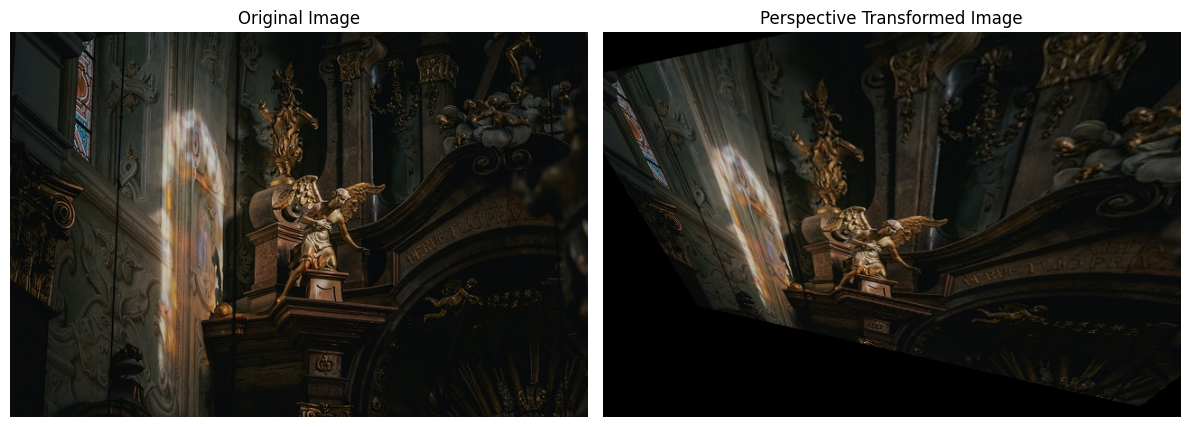

In [13]:
start = np.float32([[50, 50], [400, 50], [50, 300], [400, 300]])
end = np.float32([[10, 100], [380, 60], [100, 260], [350, 300]])

perspective_matrix = cv2.getPerspectiveTransform(start,end)

img_perspective = cv2.warpPerspective(img, perspective_matrix, (w,h))

imgs = [img, img_perspective]
titles = ['Original Image', 'Perspective Transformed Image']

plt.figure(figsize=(12,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# **3. Image Rotation**

* 회전 변환 행렬은 포인트가 없어도 정의할 수 있기 때문에 회전각을 입력받아서 변환시킨다.

* 하나의 인자를 더 받는데, 크기를 변화시킬 수 있는 scale을 입력받는다.

* 행렬에 스케일 인자가 곱해져서 좌표가 매핑된다.

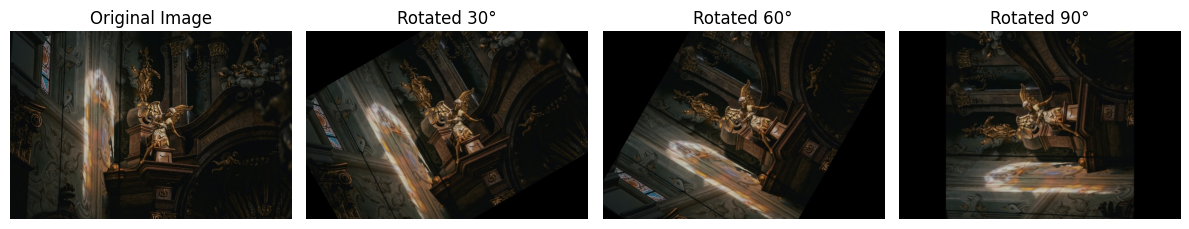

In [17]:
angles = [30,60,90]
scale = 1.0 

rotated_images = [img]
titles = ['Original Image'] + [f'Rotated {angle}°' for angle in angles]

for angle in angles:
    center = (w/2, h/2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    img_rotated = cv2.warpAffine(img, rotation_matrix, (w,h))
    rotated_images.append(img_rotated)

plt.figure(figsize=(12,8))
for i in range(len(rotated_images)):
    plt.subplot(1, len(rotated_images), i+1)
    plt.imshow(rotated_images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()